# 패키지 불러오기

In [31]:
import os.path
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 불러오기

In [32]:
train = pd.read_csv('train.csv', encoding='euc-kr')
train.columns = ['DateTime', 'Users', 'Sessions', 'NewVisitors', 'PageViews']

In [33]:
train.head()

,DateTime,Users,Sessions,NewVisitors,PageViews
0,2018-09-09 00:00:00,19,19,8,206
1,2018-09-09 01:00:00,20,19,9,259
2,2018-09-09 02:00:00,12,9,1,48
3,2018-09-09 03:00:00,10,10,2,102
4,2018-09-09 04:00:00,6,5,3,18


In [34]:
train['DateTime'] = pd.to_datetime(train['DateTime'])

# 월별 평균 사용자, 세션, 신규방문자, 페이지뷰

In [35]:
train['YearMonth'] = train['DateTime'].dt.to_period('M')
year_month = train.groupby('YearMonth').mean().reset_index()

In [36]:
year_month.head()

,YearMonth,Users,Sessions,NewVisitors,PageViews
0,2018-09,9.433712,8.892045,1.967803,67.316288
1,2018-10,6.213710,6.198925,2.211022,37.901882
2,2018-11,9.259722,9.419444,3.501389,71.037500
3,2018-12,9.840054,9.752688,2.657258,93.572581
4,2019-01,12.599462,12.536290,3.501344,101.442204


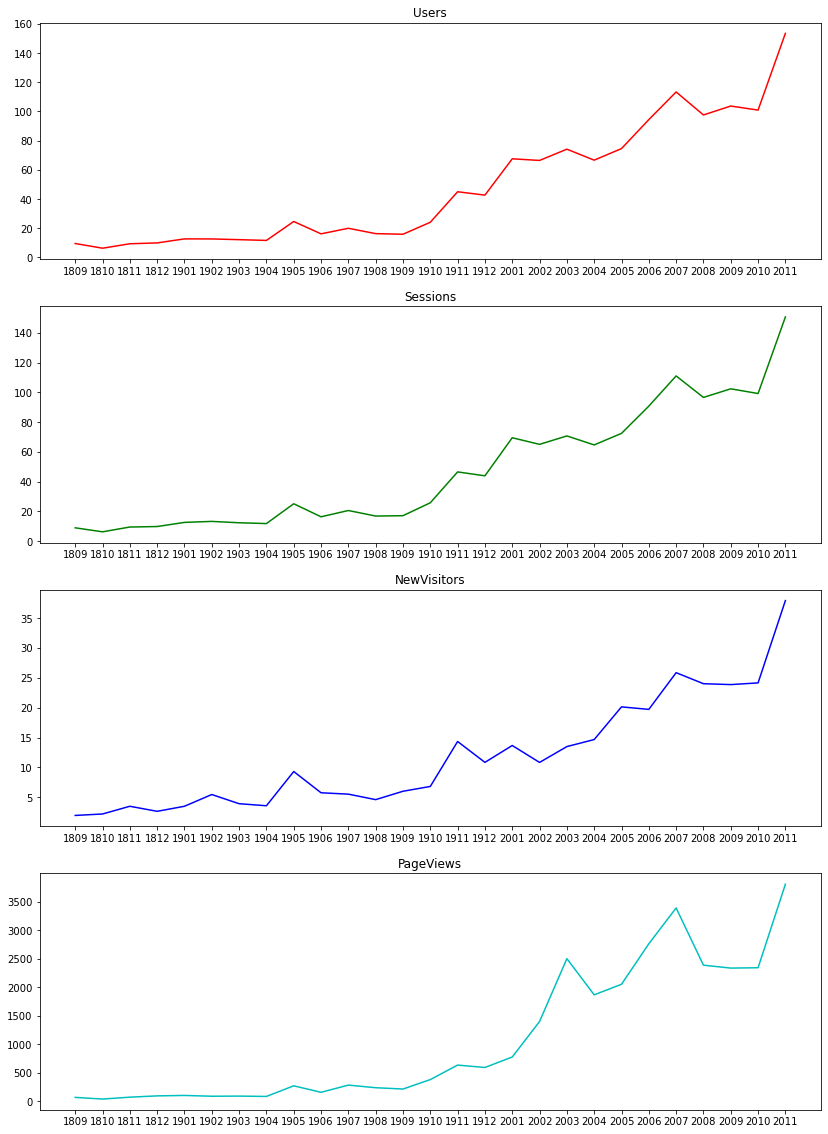

In [37]:
fig, axes = plt.subplots(4, 1, figsize=(14, 20))
axes[0].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['Users'], 'r')
axes[1].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['Sessions'], 'g')
axes[2].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['NewVisitors'], 'b')
axes[3].plot(year_month['YearMonth'].dt.strftime('%y%m'), year_month['PageViews'], 'c')
for i, title in enumerate(['Users', 'Sessions', 'NewVisitors', 'PageViews']):
    axes[i].set_title(title)
plt.show()

# 요일별 평균 사용자, 세션, 신규방문자, 페이지뷰

In [40]:
categories = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
train['WeekDay'] = train['DateTime'].dt.day_name()

In [42]:
week_day = train.groupby('WeekDay').mean().reindex(categories).reset_index()

In [43]:
week_day

,WeekDay,Users,Sessions,NewVisitors,PageViews
0,Sunday,33.768275,33.426170,7.387792,744.341374
1,Monday,53.110251,52.724189,13.171460,1211.181785
2,Tuesday,52.755531,52.321903,13.490413,1190.706490
3,Wednesday,50.351401,49.934366,12.553835,1117.569690
4,Thursday,49.224558,48.973083,12.162979,1058.787242
5,Friday,46.671091,46.381268,11.678466,1026.230826
6,Saturday,33.661504,33.306416,7.775811,722.422198


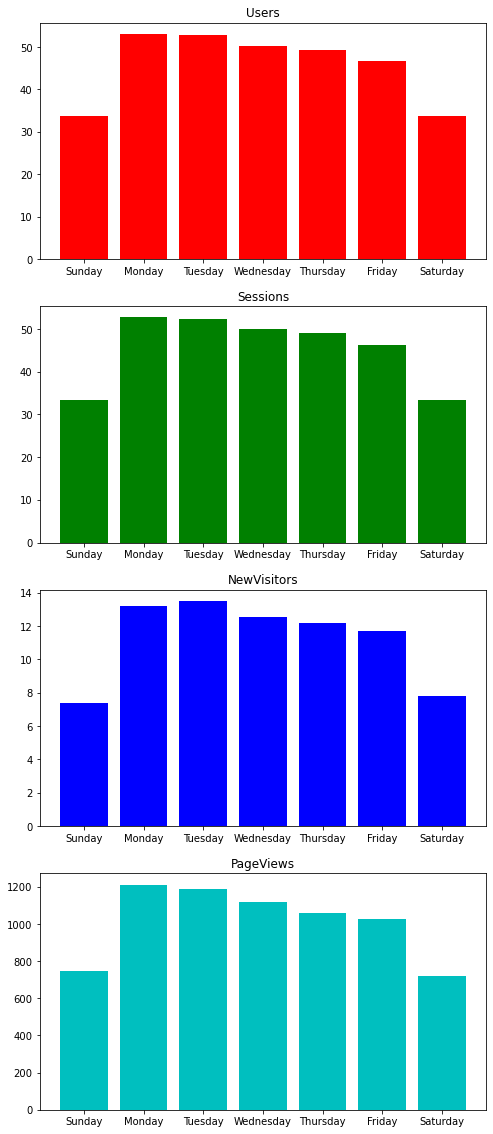

In [45]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(week_day['WeekDay'], week_day['Users'], color='r')
axes[1].bar(week_day['WeekDay'], week_day['Sessions'], color='g')
axes[2].bar(week_day['WeekDay'], week_day['NewVisitors'], color='b')
axes[3].bar(week_day['WeekDay'], week_day['PageViews'], color='c')
for i, title in enumerate(['Users', 'Sessions', 'NewVisitors', 'PageViews']):
    axes[i].set_title(title)
plt.show()

# 시간대별 평균 사용자, 세션, 신규방문자, 페이지뷰

In [46]:
train['Hour'] = train['DateTime'].dt.hour
hour = train.groupby('Hour').mean().reset_index()

In [47]:
hour.head()

,Hour,Users,Sessions,NewVisitors,PageViews
0,0,46.270202,50.710859,10.125000,1064.257576
1,1,29.064394,27.231061,6.170455,623.564394
2,2,18.179293,17.118687,3.853535,379.474747
3,3,11.486111,10.780303,2.606061,236.808081
4,4,7.443182,7.023990,1.827020,141.917929


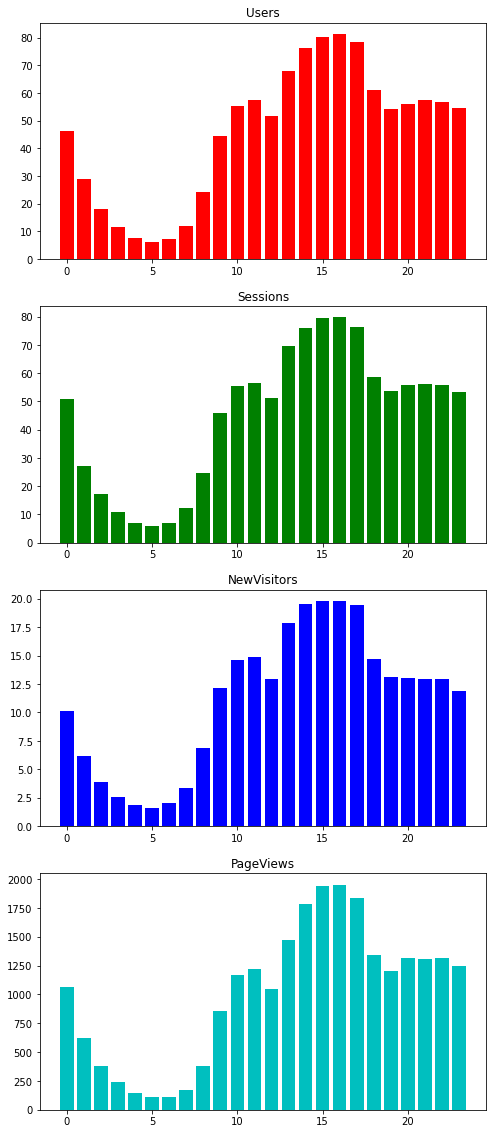

In [48]:
fig, axes = plt.subplots(4, 1, figsize=(8, 20))
axes[0].bar(hour['Hour'], hour['Users'], color='r')
axes[1].bar(hour['Hour'], hour['Sessions'], color='g')
axes[2].bar(hour['Hour'], hour['NewVisitors'], color='b')
axes[3].bar(hour['Hour'], hour['PageViews'], color='c')
for i, title in enumerate(['Users', 'Sessions', 'NewVisitors', 'PageViews']):
    axes[i].set_title(title)
plt.show()